# AirBnB & Zillow Data Challenge

## Problem Statement
You are consulting for a real estate company that has a niche in purchasing properties to rent out short-term as part of their business model specifically within New York City.  The real estate company has already concluded that two bedroom properties are the most profitable; however, they do not know which zip codes are the best to invest in.    

The real estate company has engaged your firm to build out a data product and provide your conclusions to help them understand which zip codes would generate the most profit on short term rentals within New York City.

You will be looking at publicly available data from Zillow and AirBnB:
- Cost data: Zillow provides us an estimate of value for two-bedroom properties
- Revenue data: AirBnB is the medium through which the investor plans to lease out their investment property. Fortunately for you, we are able to see how much properties in certain neighborhoods rent out for in New York City
- You can assume an occupancy rate of 75% or you can come up with your own model to calculate occupancy; just let us know how you came to that calculation   

After meeting with the strategy team, you’ve got an idea of where to start, key concerns, and how you can help this real estate company with the market data while keeping the following assumptions in mind:
- The investor will pay for the property in cash (i.e. no mortgage/interest rate will need to be accounted for).
- The time value of money discount rate is 0% (i.e. $1 today is worth the same 100 years from now).
- All properties and all square feet within each locale can be assumed to be homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or Manhattan generates twice the revenue and costs twice as much as any other 500 square foot property within that same locale.)


---
## My Solution

Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

Enter the below input:

In [2]:
City = "New York"
Year = "2017"
Bedrooms = 2

List the input files

In [3]:
import glob
print(glob.glob("*.csv"))

['listings.csv', 'Zip_Zhvi_2bedroom.csv']


## Load data
___

### AirBnB

Read AirBnB csv file and print its dimensions

In [4]:
airbnb_df = pd.read_csv('listings.csv')
print("Name of the data: " + "AirBnB")
print("No. of Rows: ", airbnb_df.shape[0])
print("No. of Columns: ", airbnb_df.shape[1])

Name of the data: AirBnB
No. of Rows:  40753
No. of Columns:  95


___
### Zillow

Read Zillow csv file and print its dimensions

In [5]:
zillow_df = pd.read_csv('Zip_Zhvi_2bedroom.csv')
print("Name of the data: " + "Zillow")
print("No. of Rows: ", zillow_df.shape[0])
print("No. of Columns: ", zillow_df.shape[1])

Name of the data: Zillow
No. of Rows:  8946
No. of Columns:  262


___
# Prepare Data


# AirBnB

Print the AirBnB information

In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40753 entries, 0 to 40752
Data columns (total 95 columns):
id                                  40753 non-null int64
listing_url                         40753 non-null object
scrape_id                           40753 non-null int64
last_scraped                        40753 non-null object
name                                40718 non-null object
summary                             39138 non-null object
space                               27881 non-null object
description                         40734 non-null object
experiences_offered                 40753 non-null object
neighborhood_overview               23629 non-null object
notes                               14607 non-null object
transit                             25460 non-null object
access                              23580 non-null object
interaction                         22477 non-null object
house_rules                         25919 non-null object
thumbnail_url          

Print Top 5 rows from AirBnB table

In [7]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,20170502132028,2017-05-03,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle français et anglais, (lire Français c...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,We are walkable to Pelham Park which is the la...,"On the island, you can walk to everything. A ...",Feel free to enjoy our large backyard in seaso...,We speak fluent French and English. We will b...,No extra guests or visitors who are not in the...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,119445,https://www.airbnb.com/users/show/119445,Linda & Didier,2010-05-06,"New York, New York, United States","I am a designer, former instructor at a design...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/2de30fe4-b...,https://a0.muscache.com/im/pictures/2de30fe4-b...,City Island,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.852054,-73.788680,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air condition...",NaN,$99.00,NaN,NaN,$100.00,NaN,1,$20.00,1,7,yesterday,NaN,24,54,80,170,2017-05-03,25,2016-01-18,2017-04-23,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,20170502132028,2017-05-04,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You’ll love my...,(URL HIDDEN),My place is close to Sea Shore. You’ll love my...,none,(URL HIDDEN),"Fine sea food restaurant, bars and night clubs...",NaN,"public transport from Grand Central, NYC or fr...",NaN,NaN,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,9117975,https://www.airbnb.com/users/show/9117975,Collins,2013-09-29,"New York, New York, United States",I am married with 3 children and 2 grandkid. ...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/9117975/profi...,https://a0.muscache.com/im/users/9117975/profi...,City Island,1.0,1.0,"['phone', 'facebook']",t,f,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.853491,-73

## Data Quality Check

### Missing Values

In [8]:
# Total missing values for each feature
airbnb_df.isnull().sum()

id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                   35
summary                              1615
space                               12872
description                            19
experiences_offered                     0
neighborhood_overview               17124
notes                               26146
transit                             15293
access                              17173
interaction                         18276
house_rules                         14834
thumbnail_url                        8616
medium_url                           8616
picture_url                             0
xl_picture_url                       8616
host_id                                 0
host_url                                0
host_name                             251
host_since                            251
host_location                     

Zipcode column contains **611** missing values. Zipcodes are imputed by selecting a non-NA value from Neighbourhood Cleansed.

In [9]:
airbnb_df['zipcode'] = airbnb_df.apply(
    lambda row: airbnb_df.loc[(airbnb_df['neighbourhood_cleansed'] == row['neighbourhood_cleansed']) & (airbnb_df['zipcode'].isin(airbnb_df[pd.notnull(airbnb_df['zipcode'])]['zipcode']))].iloc[0]['zipcode'] if(np.all(pd.isnull(row['zipcode']))) else row['zipcode'],
    axis=1
)

In [10]:
# Total missing values for zipcode after correction
airbnb_df['zipcode'].isnull().sum()

0

### Price Cleanup

Cleanup **price**,**weekly_price** and **monthly_price** columns and convert to numeric values.

In [11]:
airbnb_df['price'] = pd.to_numeric(airbnb_df['price'].str.replace(',', '').str.replace('$', ''))
airbnb_df['weekly_price'] = pd.to_numeric(airbnb_df['weekly_price'].fillna('0').str.replace(',', '').str.replace('$', ''))
airbnb_df['monthly_price'] = pd.to_numeric(airbnb_df['monthly_price'].fillna('0').str.replace(',', '').str.replace('$', ''))

Print the stats of the 'price' column

In [12]:
airbnb_df['price'].describe()

count    40753.000000
mean       145.286359
std        209.946665
min         10.000000
25%         70.000000
50%        100.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

### Check for Negative Values

In [13]:
any(airbnb_df['price']<0)

False

In [14]:
any(airbnb_df['weekly_price']<0)

False

In [15]:
any(airbnb_df['monthly_price']<0)

False

### Check for duplicates

In [16]:
any(airbnb_df.duplicated())

False

## Data Filtering


Remove unnecessary columns

In [17]:
airbnb_df_cleaned = airbnb_df.filter(items=['last_scraped', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_location'])

In [18]:
airbnb_df_cleaned['zipcode'] = pd.to_numeric(airbnb_df_cleaned['zipcode'].str.replace('1m', '1000000').str[:5])


In [19]:
airbnb_df_cleaned.head()

,last_scraped,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_location
0,2017-05-03,City Island,City Island,Bronx,10464.0,40.852054,-73.788680,House,Private room,2,1.0,1.0,1.0,99.0,24,54,80,170,25,2016-01-18,2017-04-23,100.0,10.0,10.0
1,2017-05-04,City Island,City Island,Bronx,10464.0,40.853491,-73.788607,Apartment,Private room,4,1.0,1.0,1.0,200.0,30,60,90,180,0,NaN,NaN,NaN,NaN,NaN
2,2017-05-04,City Island,City Island,Bronx,10464.0,40.841144,-73.783052,House,Entire home/apt,4,3.0,3.0,3.0,300.0,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN
3,2017-05-05,City Island,City Island,Bronx,10464.0,40.849775,-73.786609,Apartment,Entire home/apt,3,1.0,1.0,1.0,125.0,8,30,60,335,12,2015-07-04,2016-10-24,93.0,10.0,10.0
4,2017-05-04,City Island,City Island,Bronx,10464.0,40.850024,-73.789328,House,Private room,4,1.0,1.0,1.0,69.0,17,47,77,352,86,2015-05-25,2017-04-22,97.0,10.0,10.0


In [20]:
airbnb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40753 entries, 0 to 40752
Data columns (total 24 columns):
last_scraped                    40753 non-null object
neighbourhood                   34748 non-null object
neighbourhood_cleansed          40753 non-null object
neighbourhood_group_cleansed    40753 non-null object
zipcode                         32563 non-null float64
latitude                        40753 non-null float64
longitude                       40753 non-null float64
property_type                   40753 non-null object
room_type                       40753 non-null object
accommodates                    40753 non-null int64
bathrooms                       40594 non-null float64
bedrooms                        40684 non-null float64
beds                            40674 non-null float64
price                           40753 non-null float64
availability_30                 40753 non-null int64
availability_60                 40753 non-null int64
availability_90        

___
# Zillow

Print the Zillow information

In [21]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8946 entries, 0 to 8945
Columns: 262 entries, RegionID to 2017-06
dtypes: float64(213), int64(45), object(4)
memory usage: 17.9+ MB


Print Top 5 rows from Zillow table

In [22]:
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798600.0,798800.0,801500.0,804600.0,814900.0,828300.0,835700.0,849300.0,858100.0,854000.0,834800.0,821700.0,830300.0,853700.0,868300.0,875200.0,882200.0,892400.0,905000.0,924000.0,934400.0,932100.0,927500.0,923600.0,907900.0,890900.0,883400.0,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,167200.0,166900.0,166900.0,168000.0,170100.0,171700.0,173000.0,17460

## Data Quality Check

### Missing Values

In [23]:
# Total missing values for each feature
zillow_df.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro          250
CountyName       0
SizeRank         0
1996-04       2662
1996-05       2582
1996-06       2582
1996-07       2577
1996-08       2576
1996-09       2576
1996-10       2576
1996-11       2566
1996-12       2566
1997-01       2542
1997-02       2113
1997-03       2093
1997-04       2093
1997-05       2093
1997-06       2091
1997-07       2091
1997-08       1994
1997-09       1991
1997-10       1991
1997-11       1988
1997-12       1984
1998-01       1967
1998-02       1822
1998-03       1821
1998-04       1865
1998-05       1973
1998-06       1961
1998-07       1776
1998-08       1742
1998-09       1742
1998-10       1730
1998-11       1709
1998-12       1707
1999-01       1706
1999-02       1689
1999-03       1688
1999-04       1688
1999-05       1685
1999-06       1675
1999-07       1675
1999-08       1652
1999-09       1652
1999-10       1652
1999-11       1652
1999-12       1652
2000-01     

### Check for Negative Values

In [24]:
any(zillow_df['RegionName']<0)

False

### Check for duplicates

In [25]:
any(zillow_df.duplicated())

False

## Data Filtering


Get the median Cost data by Year

In [26]:
def Calculate_Median(year):
    return zillow_df.filter(regex=str(year)).median(axis = 1, skipna = True) 

In [27]:
zillow_cost_df = pd.DataFrame()

In [28]:
for year in range(1996, 2018):
    zillow_cost_df[year] = Calculate_Median(year)

In [29]:
zillow_cost_df.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,814900.0,871750.0,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,1141150.0,1224700.0,1361250.0,1342900.0
1,167200.0,185350.0,200150.0,233400.0,268050.0,300900.0,313700.0,333900.0,343850.0,359150.0,371000.0,378950.0,368650.0,342700.0,323300.0,301450.0,302300.0,328750.0,344750.0,354050.0,364450.0,381950.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1385550.0,1259000.0,1381750.0,1447850.0,1635850.0,1374950.0,1344550.0,1379700.0,1380450.0,1496400.0,1729600.0,1724050.0,1913000.0,1988700.0
3,193600.0,213500.0,233200.0,259350.0,296050.0,326950.0,342900.0,362550.0,371600.0,394650.0,404150.0,409150.0,395050.0,364400.0,342500.0,326500.0,323200.0,356250.0,374300.0,378050.0,396050.0,409450.0
4,60800.0,58250.0,57950.0,58600.0,59850.0,58100.0,56900.0,57850.0,63700.0,70100.0,77900.0,85650.0,85050.0,84900.0,83350.0,82750.0,82150.0,81800.0,81350.0,80950.0,82500.0,83800.0


Trim the Cost dataset to contain only Rename and City

In [30]:
zillow_df_cleaned = zillow_df[['RegionName','City']]

Concat Region/City with Price

In [31]:
zillow_df_cleaned = pd.concat([zillow_df_cleaned, zillow_cost_df], axis=1)

Rename

In [32]:
zillow_df_cleaned.rename(columns={'RegionName': 'zipcode'}, inplace=True)

In [33]:
zillow_df_cleaned.head()

,zipcode,City,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,10025,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,814900.0,871750.0,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,1141150.0,1224700.0,1361250.0,1342900.0
1,60657,Chicago,167200.0,185350.0,200150.0,233400.0,268050.0,300900.0,313700.0,333900.0,343850.0,359150.0,371000.0,378950.0,368650.0,342700.0,323300.0,301450.0,302300.0,328750.0,344750.0,354050.0,364450.0,381950.0
2,10023,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1385550.0,1259000.0,1381750.0,1447850.0,1635850.0,1374950.0,1344550.0,1379700.0,1380450.0,1496400.0,1729600.0,1724050.0,1913000.0,1988700.0
3,60614,Chicago,193600.0,213500.0,233200.0,259350.0,296050.0,326950.0,342900.0,362550.0,371600.0,394650.0,404150.0,409150.0,395050.0,364400.0,342500.0,326500.0,323200.0,356250.0,374300.0,378050.0,396050.0,409450.0
4,79936,El Paso,60800.0,58250.0,57950.0,58600.0,59850.0,58100.0,56900.0,57850.0,63700.0,70100.0,77900.0,85650.0,85050.0,84900.0,83350.0,82750.0,82150.0,81800.0,81350.0,80950.0,82500.0,83800.0


In [34]:
zillow_df_plot = zillow_df_cleaned[(zillow_df_cleaned['City']==City)].drop('City', 1).set_index('zipcode')

In [35]:
zillow_df_plot = zillow_df_plot.T

Plot Median Cost vs Year per Zip Code for the last 5 years

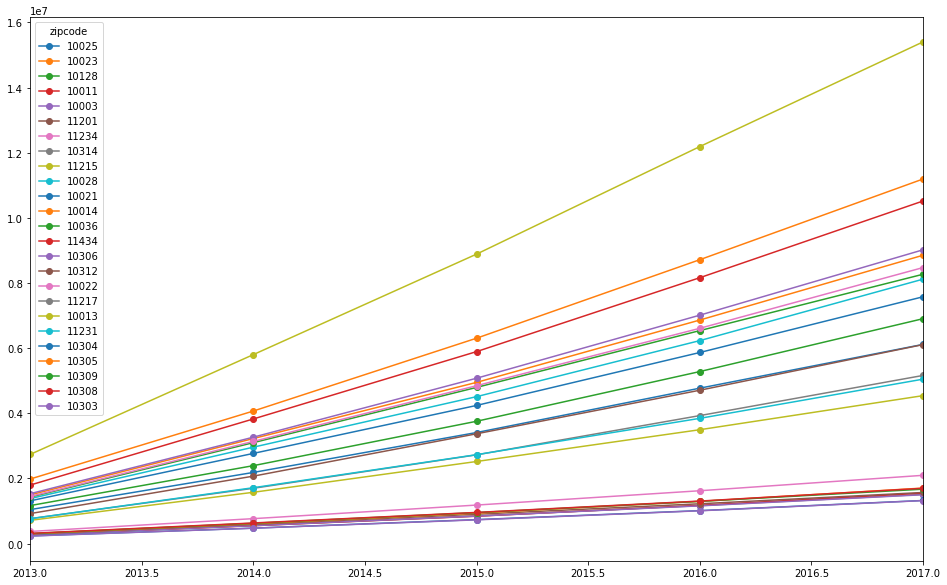

In [36]:
zillow_df_plot = zillow_df_plot.loc[zillow_df_plot.index > 2012]
zillow_df_plot = zillow_df_plot.cumsum()
zillow_df_plot.plot(style='.-', marker='o', markevery=1, figsize=(16, 10))

Select price for year 2017

In [37]:
zillow_df_cleaned = zillow_df_cleaned[['zipcode','City',2017]].rename(columns={2017: 'cost'})

Convert price to numeric

In [38]:
zillow_df_cleaned['cost'] = pd.to_numeric(zillow_df_cleaned['cost'])

In [39]:
zillow_df_cleaned.head()

,zipcode,City,cost
0,10025,New York,1342900.0
1,60657,Chicago,381950.0
2,10023,New York,1988700.0
3,60614,Chicago,409450.0
4,79936,El Paso,83800.0


# Exploratory Data Analysis


## Data Join

In [40]:
def merge_data(cost_df, revenue_df, city, bedrooms):
    combined_df = pd.merge(cost_df, revenue_df, on='zipcode')
    # Filter data for 2 bedrooms
    combined_df = combined_df.loc[combined_df['bedrooms'] == bedrooms]
    # Filter the zipcodes to New York Area
    combined_df = combined_df[(combined_df['City']==city)]
    return combined_df

In [41]:
combined_df = merge_data(zillow_df_cleaned, airbnb_df_cleaned, City, Bedrooms)

In [42]:
combined_df.head()

,zipcode,City,cost,last_scraped,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_location
25,10025,New York,1342900.0,2017-05-03,Morningside Heights,Morningside Heights,Manhattan,40.804515,-73.964502,Apartment,Entire home/apt,4,1.0,2.0,3.0,189.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
33,10025,New York,1342900.0,2017-05-03,Morningside Heights,Morningside Heights,Manhattan,40.807344,-73.967304,Apartment,Entire home/apt,5,1.0,2.0,3.0,250.0,0,0,0,0,1,2016-08-15,2016-08-15,80.0,10.0,10.0
38,10025,New York,1342900.0,2017-05-03,Morningside Heights,Morningside Heights,Manhattan,40.803949,-73.964360,Apartment,Entire home/apt,6,2.0,2.0,3.0,600.0,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN
53,10025,New York,1342900.0,2017-05-03,Morningside Heights,Morningside Heights,Manhattan,40.804249,-73.965437,Apartment,Entire home/apt,5,2.0,2.0,3.0,200.0,0,0,0,32,0,NaN,NaN,NaN,NaN,NaN
55,10025,New York,1342900.0,2017-05-03,Morningside Heights,Morningside Heights,Manhattan,40.805415,-73.962302,Apartment,Entire home/apt,4,1.0,2.0,2.0,290.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [43]:
print("Name of the data: " + "Combined AirBnB & Zillow")
print("No. of Rows: ", combined_df.shape[0])
print("No. of Columns: ", combined_df.shape[1])

Name of the data: Combined AirBnB & Zillow
No. of Rows:  1046
No. of Columns:  26


In [44]:
print("No. of Distinct Zipcodes: ", combined_df.zipcode.nunique())

No. of Distinct Zipcodes:  21


In [45]:
print('Unique neighbourhoods:')
for key in combined_df.groupby(['neighbourhood_group_cleansed']).groups.keys() :
    print(key)

Unique neighbourhoods:
Brooklyn
Manhattan
Queens
Staten Island


In [46]:
print('Unique property_type:')
for key in combined_df.groupby(['property_type']).groups.keys() :
    print(key)

Unique property_type:
Apartment
Condominium
House
Loft
Other
Townhouse


In [47]:
# Total missing values for each feature
combined_df.isnull().sum()

zipcode                           0
City                              0
cost                              0
last_scraped                      0
neighbourhood                   137
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         4
bedrooms                          0
beds                              2
price                             0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review                    218
last_review                     216
review_scores_rating            230
review_scores_accuracy          232
review_scores_location          234
dtype: int64

## Insights

Zipcodes are evaluated on the following conditions

- **Cost** (Property Cost from Zillow)
- **Revenue** (Nightly Price from AirBnB)
- **Occupancy** (Availability)
- **Popularity** (No. of Reviews and Rating Scores)

In [48]:
def plot_bargraph_with_groupings(df, groupby, colourby, kind, title, xlabel, ylabel, FIG_SIZE):
    """
    Plots a dataframe showing the frequency of datapoints grouped by one column and coloured by another.
    df : dataframe
    groupby: the column to groupby
    colourby: the column to color by
    title: the graph title
    xlabel: the x label,
    ylabel: the y label
    """

    import matplotlib.patches as mpatches

    # Makes a mapping from the unique colourby column items to a random color.
    ind_col_map = {x:y for x, y in zip(df[colourby].unique(),
                               [plt.cm.Paired(np.linspace(0, 1, len(df[colourby].unique())))][0])}


    # Find when the indicies of the soon to be bar graphs colors.
    unique_comb = df[[groupby, colourby]].drop_duplicates()
    name_ind_map = {x:y for x, y in zip(unique_comb[groupby], unique_comb[colourby])}
    c = df[groupby].value_counts().index.map(lambda x: ind_col_map[name_ind_map[x]])

    # Makes the bargraph.
    ax = df[groupby].value_counts().plot(kind=kind,
                                         figsize=FIG_SIZE,
                                         title=title,
                                         width=0.75,
                                         color=c)
    # Makes a legend using the ind_col_map
    legend_list = []
    for key in ind_col_map.keys():
        legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))

    # display the graph.
    plt.legend(handles=legend_list)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Test code
    #df.groupby(colourby).groupby.value_counts().unstack(0).plot.bar(figsize=(16, 8), width=0.75)

**Plot Cost Trends per Zipcode**

Text(0, 0.5, 'Zipcode')

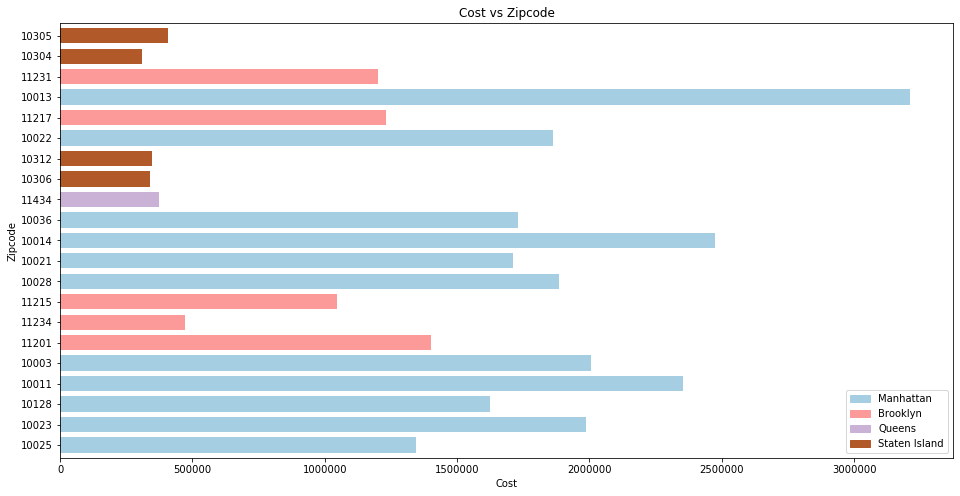

In [49]:
ind_col_map = {x:y for x, y in zip(combined_df['neighbourhood_group_cleansed'].unique(),
                               [plt.cm.Paired(np.linspace(0, 1, len(combined_df['neighbourhood_group_cleansed'].unique())))][0])}

unique_comb = combined_df[['zipcode', 'neighbourhood_group_cleansed']].drop_duplicates()

name_ind_map = {x:y for x, y in zip(unique_comb['zipcode'], unique_comb['neighbourhood_group_cleansed'])}

c = combined_df[['zipcode']].drop_duplicates().set_index('zipcode').index.map(lambda x: ind_col_map[name_ind_map[x]])


ax = combined_df[['zipcode','cost']].drop_duplicates().set_index('zipcode').plot(kind='barh',title='Cost vs Zipcode', width=0.75, figsize=(16, 8), color=[c]);

# Makes a legend using the ind_col_map
import matplotlib.patches as mpatches
legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))

# display the graph.
plt.legend(handles=legend_list)
ax.set_xlabel('Cost')
ax.set_ylabel('Zipcode')

**Plot Cost Trends per Neighbourhood**

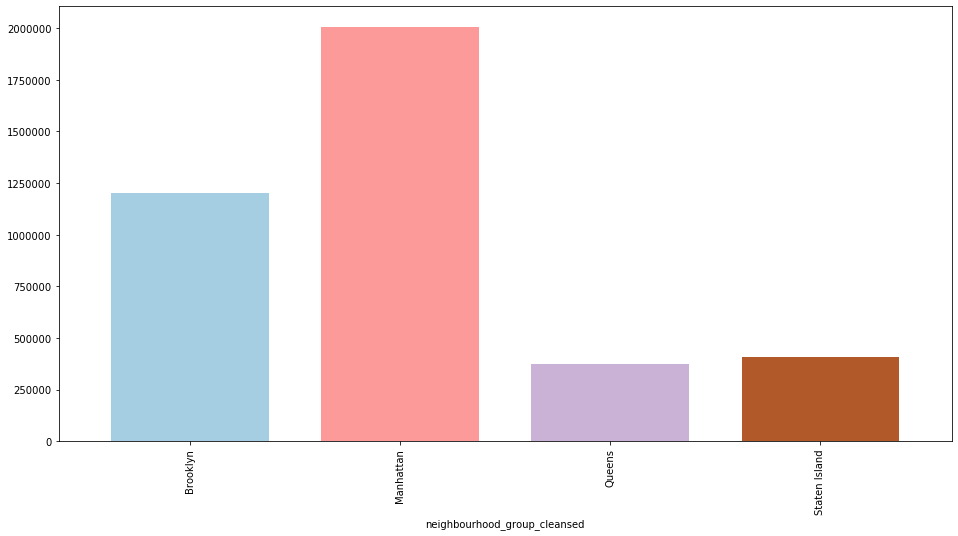

In [50]:
bar_df = combined_df.groupby('neighbourhood_group_cleansed')[['cost']].median()
bar_df.plot(kind='bar', legend=False, width=0.75, figsize=(16, 8), color=[plt.cm.Paired(np.linspace(0, 1, len(bar_df)))]);

**Plot Property Type Counts**

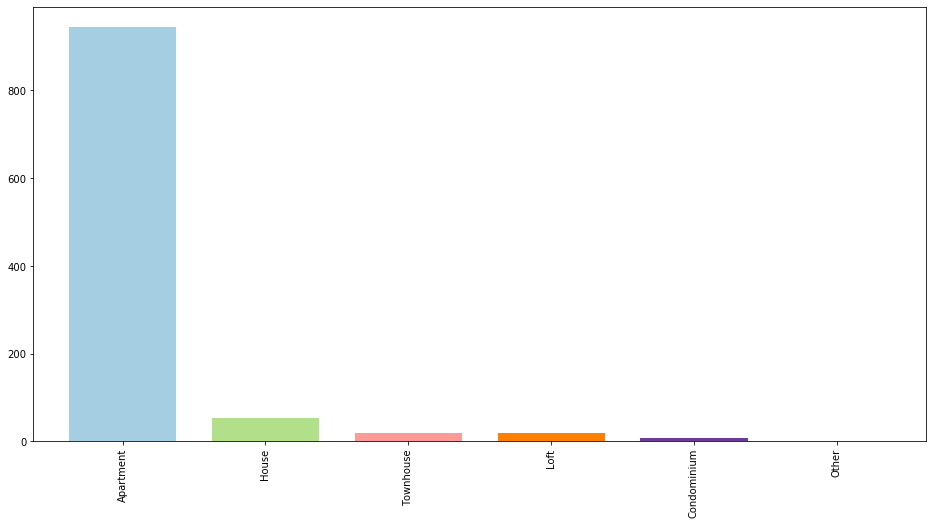

In [51]:
bar_df = pd.DataFrame(combined_df['property_type'].value_counts())
bar_df.plot(kind='bar', legend=False, width=0.75, figsize=(16, 8), color=[plt.cm.Paired(np.linspace(0, 1, len(bar_df)))]);

**No of Properties per Neighbourhood**

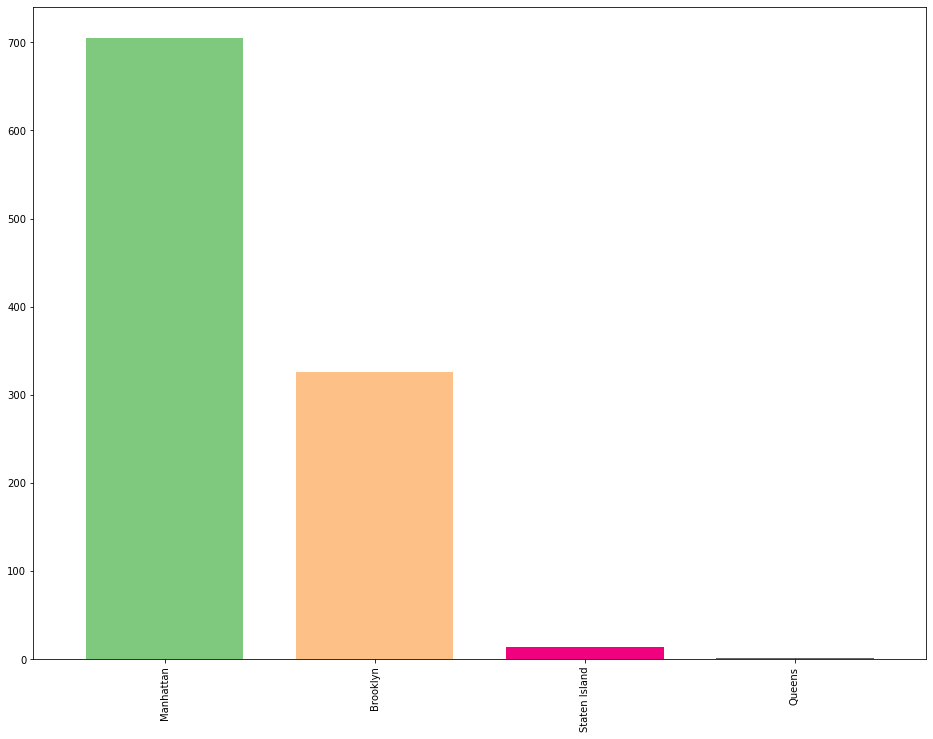

In [52]:
bar_df = pd.DataFrame(combined_df['neighbourhood_group_cleansed'].value_counts())
bar_df.plot(kind='bar', legend=False, width=0.75, figsize=(16, 12), color=[plt.cm.Accent(np.linspace(0, 1, len(bar_df)))]);

**No of Properties per Zipcode**

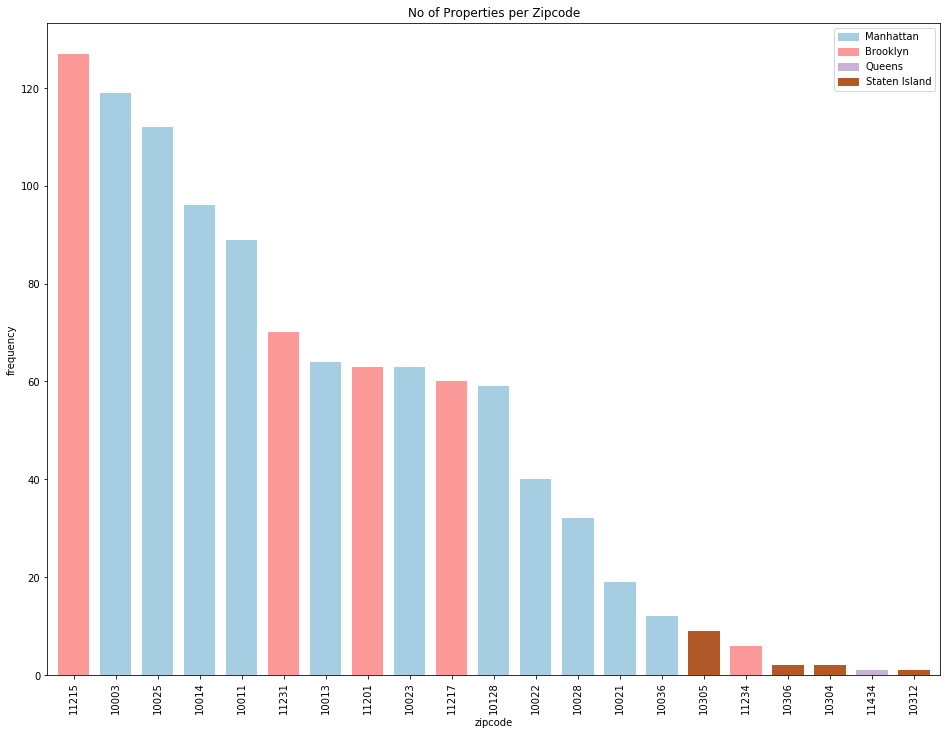

In [53]:
plot_bargraph_with_groupings(combined_df, 'zipcode', 'neighbourhood_group_cleansed', 'bar', 'No of Properties per Zipcode', 'zipcode', 'frequency', (16, 12))

### Property Type vs Price per Zipcode

Text(0, 0.5, 'Price')

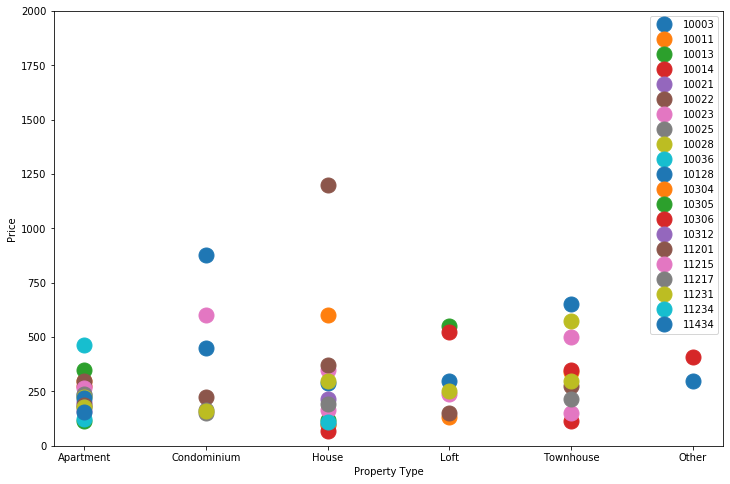

In [54]:
fig, ax = plt.subplots(figsize=(12,8))
new_df = combined_df.groupby(['zipcode','property_type'],as_index=False)[['price']].median()
groups = new_df.groupby('zipcode')
for name, group in groups:
    ax.plot(group.property_type, group.price, marker='o', linestyle='', ms=15, 
label=name)
ax.legend(numpoints=1)
ax.set_ylim((0, 2000))
ax.set_xlabel('Property Type')
ax.set_ylabel('Price')

In [55]:

new_df = combined_df.groupby(['zipcode','property_type'],as_index=False)[['price']].median()
new_df.head()

,zipcode,property_type,price
0,10003,Apartment,234.5
1,10003,Condominium,878.0
2,10003,House,290.0
3,10003,Loft,299.0
4,10003,Townhouse,650.0


### Property Type vs Price per Neighbourhood

(0, 1000)

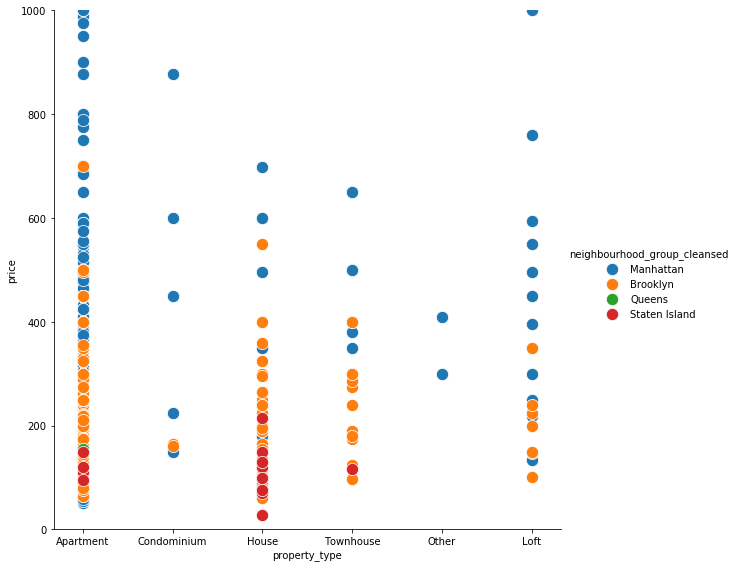

In [56]:
import seaborn as sns
sns.pairplot(x_vars=["property_type"], y_vars=["price"], data=combined_df, 
hue="neighbourhood_group_cleansed", height=8, plot_kws={"s": 150})
plt.gca().set_ylim((0, 1000))


## **Zipcode vs Price**

Text(0, 0.5, 'Price')

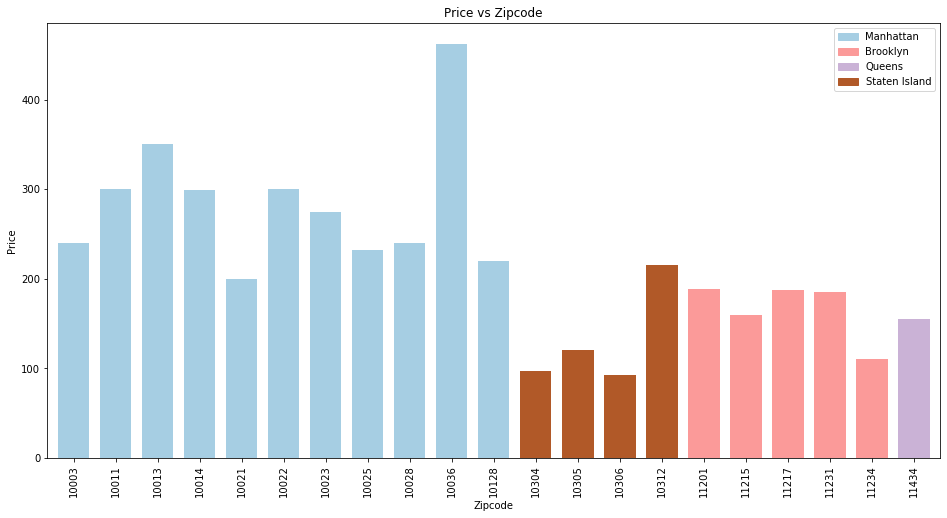

In [57]:
ind_col_map = {x:y for x, y in zip(combined_df['neighbourhood_group_cleansed'].unique(),
                               [plt.cm.Paired(np.linspace(0, 1, len(combined_df['neighbourhood_group_cleansed'].unique())))][0])}

unique_comb = combined_df[['zipcode', 'neighbourhood_group_cleansed']].drop_duplicates()

name_ind_map = {x:y for x, y in zip(unique_comb['zipcode'], unique_comb['neighbourhood_group_cleansed'])}

c = combined_df.groupby('zipcode')[['price']].median().index.map(lambda x: ind_col_map[name_ind_map[x]])

ax = combined_df.groupby('zipcode')[['price']].median().plot(kind='bar',title='Price vs Zipcode', width=0.75, figsize=(16, 8), color=[c]);

# Makes a legend using the ind_col_map
import matplotlib.patches as mpatches
legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))

# display the graph.
plt.legend(handles=legend_list)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price')

## Zipcode vs Availability

Text(0, 0.5, 'Availability')

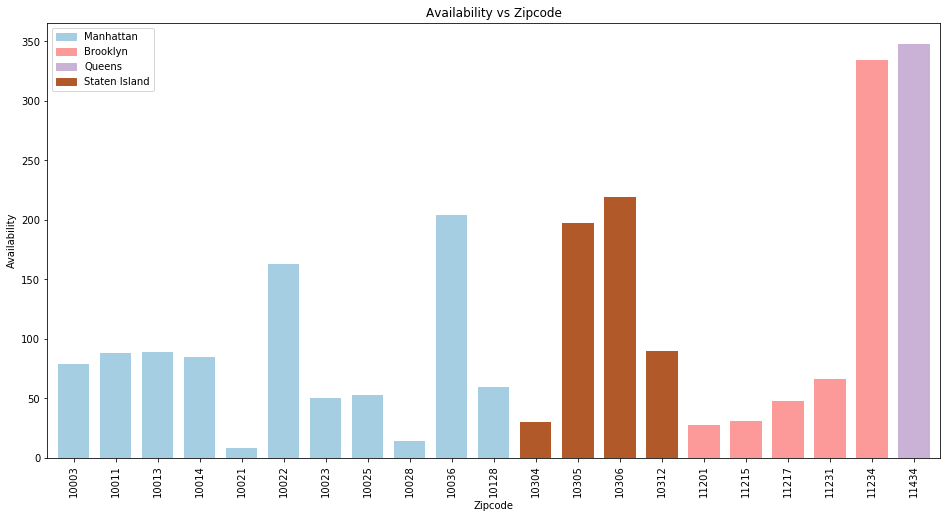

In [58]:
ind_col_map = {x:y for x, y in zip(combined_df['neighbourhood_group_cleansed'].unique(),
                               [plt.cm.Paired(np.linspace(0, 1, len(combined_df['neighbourhood_group_cleansed'].unique())))][0])}

unique_comb = combined_df[['zipcode', 'neighbourhood_group_cleansed']].drop_duplicates()

name_ind_map = {x:y for x, y in zip(unique_comb['zipcode'], unique_comb['neighbourhood_group_cleansed'])}

c = combined_df.groupby('zipcode')[['availability_365']].median().index.map(lambda x: ind_col_map[name_ind_map[x]])

ax = combined_df.groupby('zipcode')[['availability_365']].median().plot(kind='bar',title='Availability vs Zipcode', width=0.75, figsize=(16, 8), color=[c]);

# Makes a legend using the ind_col_map
import matplotlib.patches as mpatches
legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))

# display the graph.
plt.legend(handles=legend_list)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Availability')

### Property Type vs Availability

Text(0, 0.5, 'Availability')

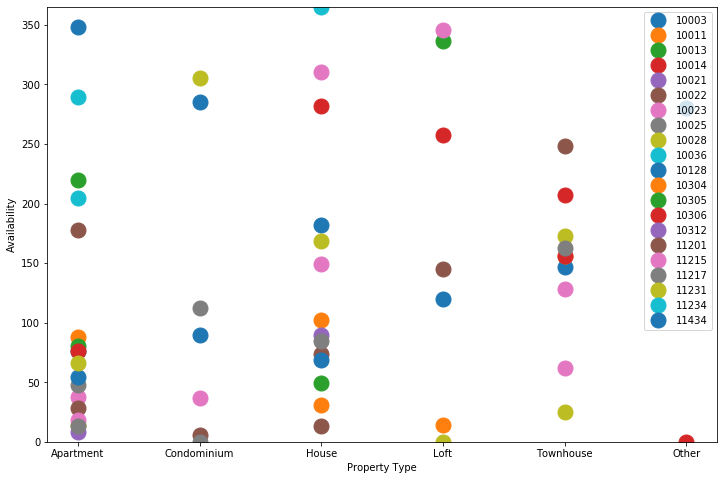

In [59]:
fig, ax = plt.subplots(figsize=(12,8))
new_df = combined_df.groupby(['zipcode','property_type'],as_index=False)[['availability_365']].median()
groups = new_df.groupby('zipcode')
for name, group in groups:
    ax.plot(group.property_type, group.availability_365, marker='o', linestyle='', ms=15, 
label=name)
ax.legend(numpoints=1)
ax.set_ylim((0, 365))
ax.set_xlabel('Property Type')
ax.set_ylabel('Availability')

## Zipcode vs No of Reviews

Text(0, 0.5, 'No of Reviews')

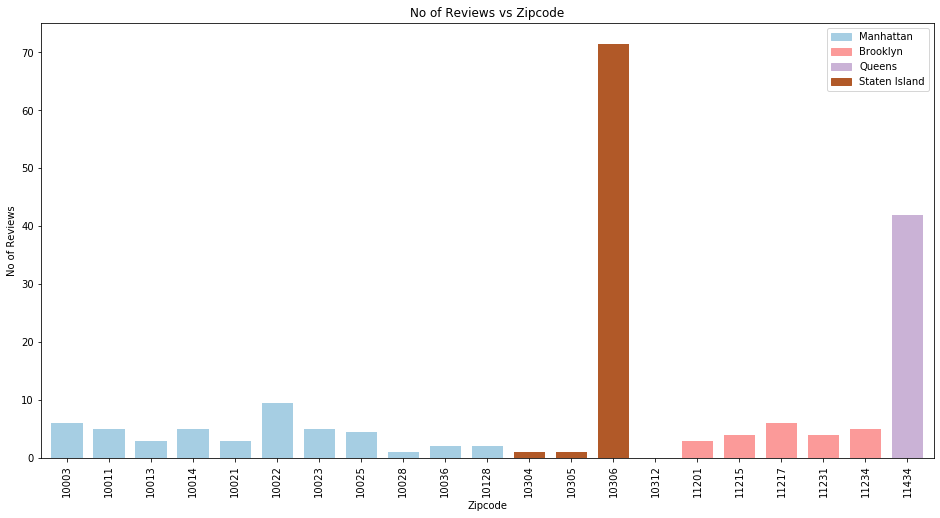

In [60]:
ind_col_map = {x:y for x, y in zip(combined_df['neighbourhood_group_cleansed'].unique(),
                               [plt.cm.Paired(np.linspace(0, 1, len(combined_df['neighbourhood_group_cleansed'].unique())))][0])}

unique_comb = combined_df[['zipcode', 'neighbourhood_group_cleansed']].drop_duplicates()

name_ind_map = {x:y for x, y in zip(unique_comb['zipcode'], unique_comb['neighbourhood_group_cleansed'])}

c = combined_df.fillna(0).groupby('zipcode')[['number_of_reviews']].median().index.map(lambda x: ind_col_map[name_ind_map[x]])

ax = combined_df.fillna(0).groupby('zipcode')[['number_of_reviews']].median().plot(kind='bar',title='No of Reviews vs Zipcode', width=0.75, figsize=(16, 8), color=[c]);

# Makes a legend using the ind_col_map
import matplotlib.patches as mpatches
legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))

# display the graph.
plt.legend(handles=legend_list)
ax.set_xlabel('Zipcode')
ax.set_ylabel('No of Reviews')

## Zipcode vs Rating Score

Text(0, 0.5, 'Rating Score')

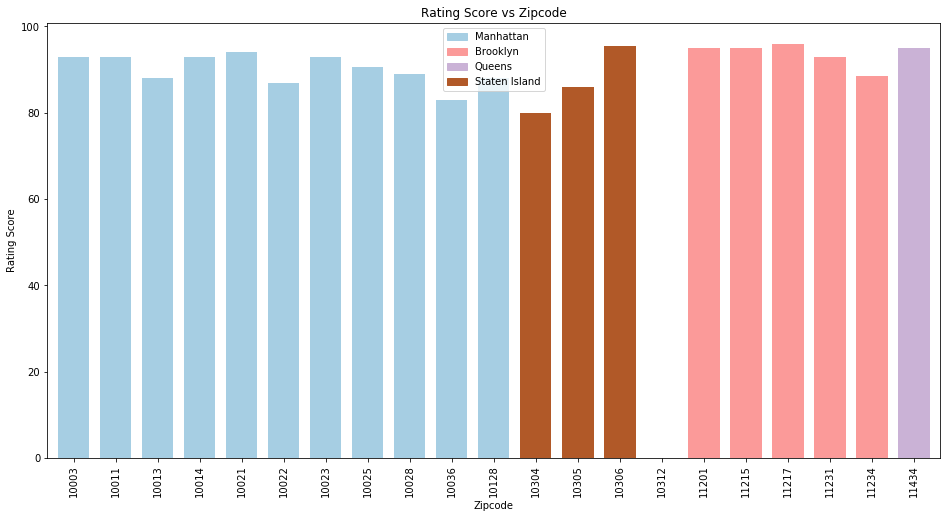

In [61]:
ind_col_map = {x:y for x, y in zip(combined_df['neighbourhood_group_cleansed'].unique(),
                               [plt.cm.Paired(np.linspace(0, 1, len(combined_df['neighbourhood_group_cleansed'].unique())))][0])}

unique_comb = combined_df[['zipcode', 'neighbourhood_group_cleansed']].drop_duplicates()

name_ind_map = {x:y for x, y in zip(unique_comb['zipcode'], unique_comb['neighbourhood_group_cleansed'])}

c = combined_df.fillna(0).groupby('zipcode')[['review_scores_rating']].median().index.map(lambda x: ind_col_map[name_ind_map[x]])

ax = combined_df.fillna(0).groupby('zipcode')[['review_scores_rating']].median().plot(kind='bar',title='Rating Score vs Zipcode', width=0.75, figsize=(16, 8), color=[c]);

# Makes a legend using the ind_col_map
import matplotlib.patches as mpatches
legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))

# display the graph.
plt.legend(handles=legend_list)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Rating Score')

# Final Conclusion

In [62]:
neighbourhood_df = combined_df[['zipcode', 'neighbourhood_group_cleansed']].drop_duplicates()
availability_df = combined_df.groupby(['zipcode'],as_index=False)[['availability_365']].median()
price_df = combined_df.groupby(['zipcode'],as_index=False)[['price']].median()
cost_df = combined_df.groupby(['zipcode'],as_index=False)[['cost']].median()
reviews_df = combined_df.fillna(0).groupby(['zipcode'],as_index=False)[['number_of_reviews']].median()
ratings_df = combined_df.fillna(0).groupby(['zipcode'],as_index=False)[['review_scores_rating']].median()
new_df1 = pd.merge(neighbourhood_df, availability_df, on='zipcode')
new_df2 = pd.merge(new_df1, price_df, on='zipcode')
new_df3 = pd.merge(new_df2, cost_df, on='zipcode')
new_df4 = pd.merge(new_df3, reviews_df, on='zipcode')
final_df = pd.merge(new_df4, ratings_df, on='zipcode')
final_df["best_value"] = (100*final_df["price"] + 100*(1/final_df["cost"]) + 10*(1/final_df["availability_365"]) + 10*(final_df["number_of_reviews"]) + 10*(final_df["review_scores_rating"]))
final_df["best_value_norm"] = (final_df["best_value"]/max(final_df["best_value"]))
final_df.sort_values('best_value',ascending=False, inplace=True)
final_df.set_index('zipcode',drop=False,inplace=True)
final_df.reset_index(drop=True,inplace=True)
final_df

,zipcode,neighbourhood_group_cleansed,availability_365,price,cost,number_of_reviews,review_scores_rating,best_value,best_value_norm
0,10036,Manhattan,204.5,462.5,1729150.0,2.0,83.0,47100.048958,1.000000
1,10013,Manhattan,89.0,350.0,3212450.0,3.0,88.0,35910.112391,0.762422
2,10011,Manhattan,88.0,300.0,2354000.0,5.0,93.0,30980.113679,0.657751
3,10022,Manhattan,163.0,300.0,1863650.0,9.5,87.0,30965.061403,0.657432
4,10014,Manhattan,84.5,299.0,2476250.0,5.0,93.0,30880.118384,0.655628
5,10023,Manhattan,50.0,275.0,1988700.0,5.0,93.0,28480.200050,0.604675
6,10003,Manhattan,79.0,240.0,2005500.0,6.0,93.0,24990.126632,0.530575
7,10028,Manhattan,14.0,239.5,1885350.0,1.0,89.0,24850.714339,0.527615
8,10025,Manhattan,52.5,232.0,1342900.0,4.5,90.5,24150.190551,0.512742
9,10128,Manhattan,60.0,220.0,1622500.0,2.0,88.0,22900.166728,0.486203


Text(0, 0.5, 'Best Value')

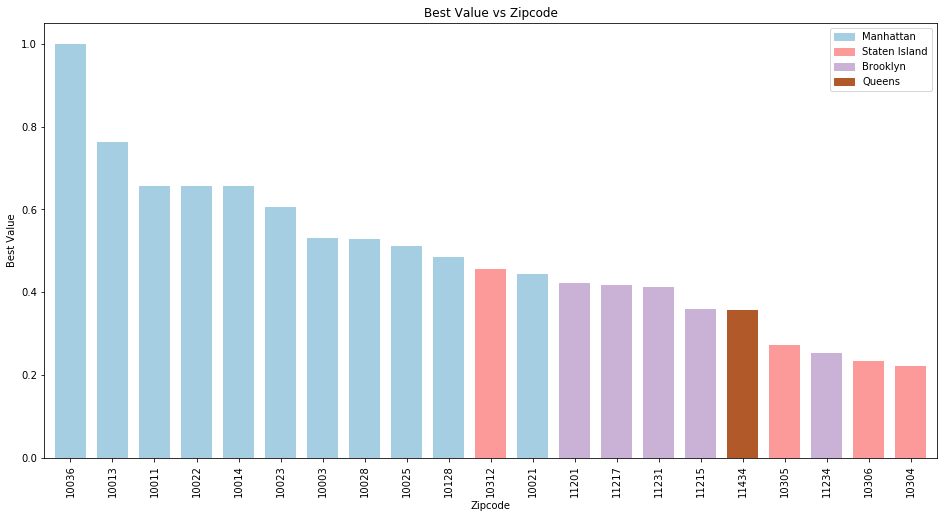

In [63]:
ind_col_map = {x:y for x, y in zip(final_df['neighbourhood_group_cleansed'].unique(),
                               [plt.cm.Paired(np.linspace(0, 1, len(final_df['neighbourhood_group_cleansed'].unique())))][0])}

unique_comb = final_df[['zipcode', 'neighbourhood_group_cleansed']].drop_duplicates()

name_ind_map = {x:y for x, y in zip(unique_comb['zipcode'], unique_comb['neighbourhood_group_cleansed'])}

c = final_df[['zipcode']].drop_duplicates().set_index('zipcode').index.map(lambda x: ind_col_map[name_ind_map[x]])

ax = final_df[['zipcode','best_value_norm']].drop_duplicates().set_index('zipcode').plot(kind='bar',title='Best Value vs Zipcode', width=0.75, figsize=(16, 8), color=[c]);

# Makes a legend using the ind_col_map
import matplotlib.patches as mpatches
legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))

# display the graph.
plt.legend(handles=legend_list)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Best Value')

## Map View of Top Zip Codes

(-1.25, 1.25, -1.25, 1.25)

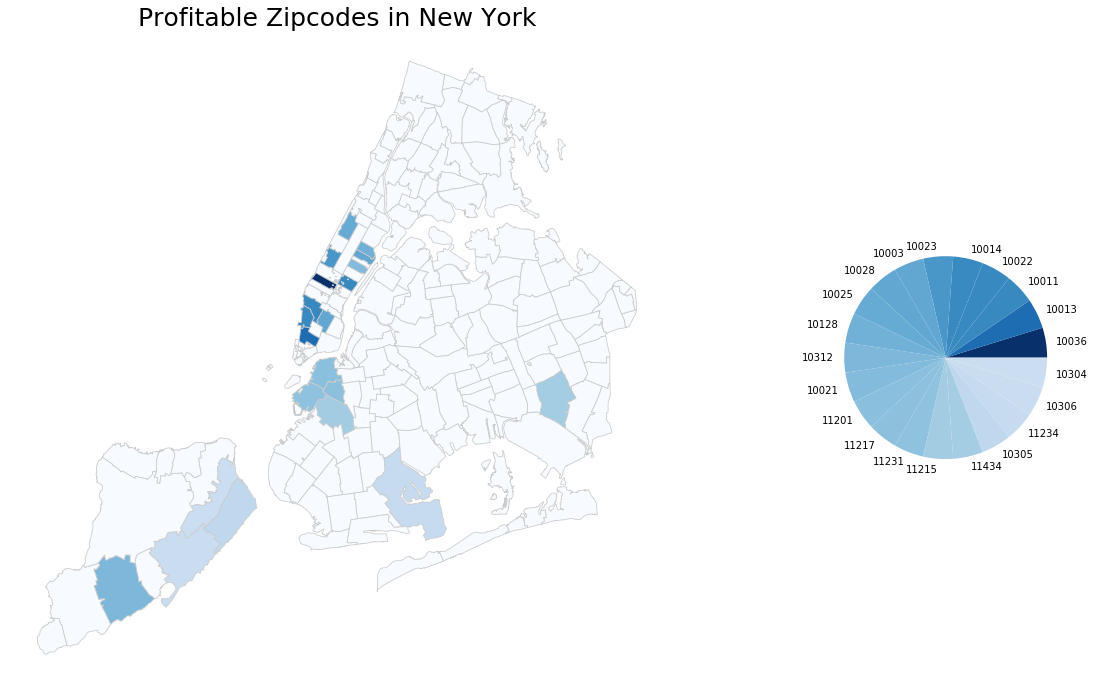

In [64]:
# set the filepath and load in a shapefile
fp = "map_data/ZIP_CODE_040114/ZIP_CODE_040114.shp"
map_df = gpd.read_file(fp)

map_df['ZIPCODE'] = pd.to_numeric(map_df['ZIPCODE'])

# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('ZIPCODE').join(final_df.set_index('zipcode'))
#merged['best_value_norm'] = merged['best_value_norm']*100
merged.fillna(0, inplace=True)

# set a variable that will call whatever column we want to visualise on the map
variable = 'best_value_norm'
# set the range for the choropleth
vmin, vmax = 0, 1
# create figure and axes for Matplotlib
#fig, ax = plt.subplots(1, figsize=(20, 12))

fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(20, 12))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax1, edgecolor='0.8')

# remove the axis
ax1.axis('off')

# add a title
ax1.set_title('Profitable Zipcodes in New York', fontdict={'fontsize': '25', 'fontweight' : '3'})

#legend
cbarlabels = np.array(final_df['zipcode']).squeeze()
cbarvalues = np.array(final_df['best_value_norm']).squeeze()
cmap = plt.cm.get_cmap('Blues')

ind_col_map = {x:y for x, y in zip(cbarlabels,cbarvalues)}

colors = []

for d in cbarlabels:
    colors.append(cmap(ind_col_map[d]))
    
final_df['zipcode'].value_counts()[final_df['zipcode'].unique()].plot(kind='pie',colors=colors,ax=ax2)

ax2.axis('off')

# Use below code to save the map
#fig.savefig(“map_export.png”, dpi=300)

# Conclusion

- Top Zip codes to Invest in terms of Cost, Revenue, Popularity and Availability = 10036,10013 and 10011
- Top Area to Invest = Manhattan
- Top Zipcodes outside Manhattan = 11434(Queens), 11217(Brooklyn) and 10306(Staten Island)